# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install kagglehub
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import kagglehub


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
symptom2disease_path = kagglehub.dataset_download('niyarrbarman/symptom2disease')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


/Users/danielfishbein/Documents/python-ml-final/ml_venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install --user -U nltk
!pip install ace_tools_open
!pip install -U nltk

!pip install contractions
!pip install scikit-learn
!pip install seaborn

!pip install bash_kernel



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
# !unzip -o /Users/jkswe/nltk_data/tokenizers/punkt.zip -d /Users/jkswe/nltk_data/tokenizers/

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import ace_tools_open as tools
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



print(symptom2disease_path + '/Symptom2Disease.csv')



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


/Users/danielfishbein/.cache/kagglehub/datasets/niyarrbarman/symptom2disease/versions/1/Symptom2Disease.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
dataset = pd.read_csv(symptom2disease_path + '/Symptom2Disease.csv')

print(dataset.isnull().values.all())

dataset["text"] = dataset["text"].str.lower() #convert all text to lowercase
print(dataset.head())

dataset["text"] = dataset["text"].apply(word_tokenize) #split each sentence into a tokenized version 
print(dataset.head())

stopWords = set(stopwords.words('english')) #Need to remove all stopwords (filler words)
customStopWords = stopWords.union({"'m", "'re", "'ve", "n't", "'ll", "'s", "'d"})
#Add contractions and punctuation into the stopwords

def removeStopwords(text):
    newList = []
    for word in text:
        if word not in customStopWords and word not in string.punctuation:
            newList.append(word)
    return newList

dataset["text"] = dataset["text"].apply(removeStopwords)
print(dataset.head())


False
   Unnamed: 0      label                                               text
0           0  Psoriasis  i have been experiencing a skin rash on my arm...
1           1  Psoriasis  my skin has been peeling, especially on my kne...
2           2  Psoriasis  i have been experiencing joint pain in my fing...
3           3  Psoriasis  there is a silver like dusting on my skin, esp...
4           4  Psoriasis  my nails have small dents or pits in them, and...
   Unnamed: 0      label                                               text
0           0  Psoriasis  [i, have, been, experiencing, a, skin, rash, o...
1           1  Psoriasis  [my, skin, has, been, peeling, ,, especially, ...
2           2  Psoriasis  [i, have, been, experiencing, joint, pain, in,...
3           3  Psoriasis  [there, is, a, silver, like, dusting, on, my, ...
4           4  Psoriasis  [my, nails, have, small, dents, or, pits, in, ...
   Unnamed: 0      label                                               text
0     

In [6]:
#Time to lematize
lemmatizer = WordNetLemmatizer()

def convertToBaseForm(text):
    return [lemmatizer.lemmatize(word) for word in text]

dataset["text"] = dataset["text"].apply(convertToBaseForm)
print(dataset.head())
print(dataset.tail())

   Unnamed: 0      label                                               text
0           0  Psoriasis  [experiencing, skin, rash, arm, leg, torso, pa...
1           1  Psoriasis  [skin, peeling, especially, knee, elbow, scalp...
2           2  Psoriasis  [experiencing, joint, pain, finger, wrist, kne...
3           3  Psoriasis  [silver, like, dusting, skin, especially, lowe...
4           4  Psoriasis  [nail, small, dent, pit, often, feel, inflamma...
      Unnamed: 0     label                                               text
1195         295  diabetes  [shaking, trembling, lost, sense, taste, smell...
1196         296  diabetes  [particularly, crevice, skin, skin, rash, irri...
1197         297  diabetes  [regularly, experience, intense, urge, want, u...
1198         298  diabetes  [trouble, breathing, especially, outside, star...
1199         299  diabetes  [constantly, sneeze, dry, cough, infection, se...


In [7]:
def joinTokens(text): 
    if isinstance(text, list):
        return " ".join(text) #If it is a list, join elements
    return str(text) #Else convert to string
    
dataset["text"] = dataset["text"].apply(joinTokens)
print(dataset.head())


   Unnamed: 0      label                                               text
0           0  Psoriasis  experiencing skin rash arm leg torso past week...
1           1  Psoriasis  skin peeling especially knee elbow scalp peeli...
2           2  Psoriasis  experiencing joint pain finger wrist knee pain...
3           3  Psoriasis  silver like dusting skin especially lower back...
4           4  Psoriasis  nail small dent pit often feel inflammatory te...


In [8]:
vectorizer = TfidfVectorizer(
    stop_words = 'english',
    ngram_range = (1, 2),   #keep some words like sore throat or chest pain together
    min_df = 2,    #Only include it if it appears in 2 or more cases. Excludes super rare words
    max_df = 0.9,  #Only include if it appears in <90# of cases. Excludes super common words
)
matrix = vectorizer.fit_transform(dataset["text"])  #Converts text to TF-IDF vectors
#This assigns higher value to more significant words

feature_names = vectorizer.get_feature_names_out()

#Convert matrix to Panda DataFrame
tfidf_df = pd.DataFrame(matrix.toarray(), columns=feature_names)
tfidf_df.insert(0, "Original_Index", dataset.index)


#Display rows
tools.display_dataframe_to_user(name="TF-IDF Representation", dataframe=tfidf_df)


TF-IDF Representation


In [9]:
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.2, random_state=20)

model = MultinomialNB(alpha = .01) # adjust the alpha to smooth inputs. This prevents rare/unseen words from giving a probability of 0
model.fit(X_train, y_train)        #If it sees a word its never seen, it will give it a probability of .1

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9792


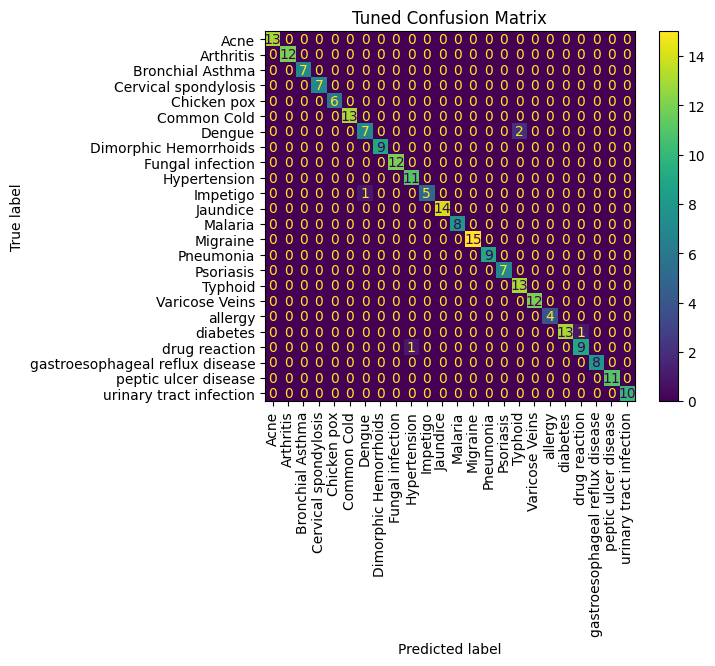

In [10]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test) #Confusion matrix
plt.xticks(rotation=90)
plt.title("Tuned Confusion Matrix")
plt.show()

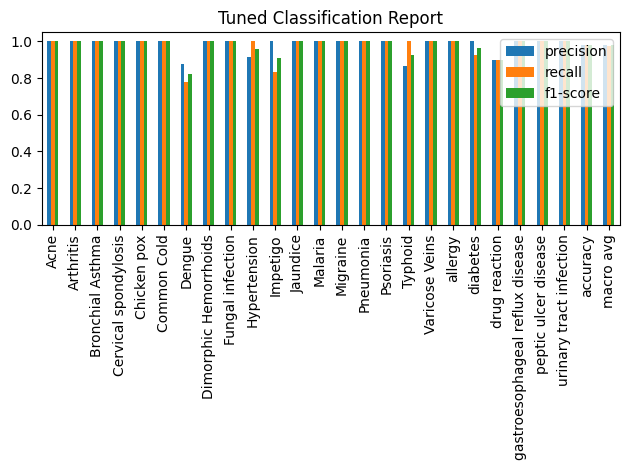

In [11]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:-1, :-1].plot(kind='bar')
plt.title("Tuned Classification Report")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
def processUserInput(text):
    # lowercase
    text = text.lower()

    # tokenize
    tokens = word_tokenize(text)

    # remove stopwords and punctuation
    filteredTokens = [
        word for word in tokens if word not in customStopWords and word not in string.punctuation
    ]

    # lemmatize
    lemmatizedTokens = [lemmatizer.lemmatize(word) for word in filteredTokens]

    # join back to string
    processedText = " ".join(lemmatizedTokens)

    return processedText

In [13]:
def predict_disease_from_input():
    while True:
        print("\nType your symptoms (or type 'exit' to quit):")
        userInput = input("> ").strip()

        if userInput.lower() == "exit":
            print("Goodbye!")
            break

        processedInput = processUserInput(userInput)

        print(processedInput)
        
        processedInput = vectorizer.transform([userInput])  # TF-IDF transform

        prediction = model.predict(processedInput)[0]
        prediction_prob = model.predict_proba(processedInput).max()

        print(f"Predicted disease: {prediction} (Confidence: {prediction_prob:.2f})")

predict_disease_from_input()



Type your symptoms (or type 'exit' to quit):
Goodbye!


In [14]:
import pickle
with open('jack_nlp_pipeline.pkl', 'wb') as f:
    pickle.dump((vectorizer, model), f)

In [15]:
with open('report.pkl', 'wb') as f:
    pickle.dump(report, f)